# 数据预处理  
**数据预处理**:是从数据中检测，纠正或删除损坏，不准确或不适用于模型的记录的过程
可能面对的问题有：数据类型不同，比如有的是文字，有的是数字，有的含时间序列，有的连续，有的间断。
也可能，数据的质量不行，有噪声，有异常，有缺失，数据出错，量纲不一，有重复，数据是偏态，数据量太
大或太小
数据预处理的目的：让数据适应模型，匹配模型的需求

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 区间缩放法  
$$
x^{*}=\frac{x-\min (x)}{\max (x)-\min (x)}
$$

### sklearn处理

In [2]:
# 给出特征
data = [[12, 16],
       [33, 55],
       [99, 100]]

In [3]:
pd.DataFrame(data, index=[1, 2, 3], columns=["fea1", "fear2"])

,fea1,fear2
1,12,16
2,33,55
3,99,100


In [4]:
from sklearn.preprocessing import MinMaxScaler
# 实例化（默认归一化到０～１）
scalar = MinMaxScaler()

In [5]:
# 得到结果
result = scalar.fit_transform(data)

In [6]:
result

array([[0.        , 0.        ],
       [0.24137931, 0.46428571],
       [1.        , 1.        ]])

In [7]:
# 恢复到原来的数据
scalar.inverse_transform(result)

array([[ 12.,  16.],
       [ 33.,  55.],
       [ 99., 100.]])

In [8]:
# 归一化到某个范围
scalar_ = MinMaxScaler(feature_range=(5, 10))
scalar = scalar_.fit_transform(data)
scalar

array([[ 5.        ,  5.        ],
       [ 6.20689655,  7.32142857],
       [10.        , 10.        ]])

In [9]:
scalar_.inverse_transform(scalar)

array([[ 12.,  16.],
       [ 33.,  55.],
       [ 99., 100.]])

### 函数表示

In [10]:
X = np.array(data)
pd.DataFrame(X)

,0,1
0,12,16
1,33,55
2,99,100


In [11]:
# 基于列计算，样本数目方向
X.min(axis=0)

array([12, 16])

In [12]:
# 归一化数据
result = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
result

array([[0.        , 0.        ],
       [0.24137931, 0.46428571],
       [1.        , 1.        ]])

In [13]:
# 显示归一化前的数据
X = result * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X

array([[ 12.,  16.],
       [ 33.,  55.],
       [ 99., 100.]])

## 归一化

In [14]:
from sklearn.preprocessing import Normalizer

# 默认l2归一化
nm = Normalizer()
nm.fit_transform(X)

array([[0.6       , 0.8       ],
       [0.51449576, 0.85749293],
       [0.7035446 , 0.71065111]])

In [15]:
# 将每一个样本的特征行进行单位化
# orm : 'l1', 'l2', or 'max', optional ('l2' by default)
X[0]/np.sqrt(X[0][0]**2 + X[0][1]**2)

array([0.6, 0.8])

## 标准化  N~(0, 1)
$$
x^{*}=\frac{x-\mu}{\sigma}
$$

### sklearn处理

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# 求解标准化的数据
std = StandardScaler()
std = std.fit(data) # 得到方差和均值
std_result = std.transform(data)
std.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [18]:
## 查看每一个特征的方差和均值
std.mean_, std.var_

(array([48., 57.]), array([1374., 1178.]))

In [19]:
# 返回标准化之前的数据
std.inverse_transform(std_result)

array([[ 12.,  16.],
       [ 33.,  55.],
       [ 99., 100.]])

### 函数实现

In [20]:
# 数据实现
std_result = (X - X.mean(axis=0))/X.std(axis=0)
std_result

array([[-0.97120103, -1.19456892],
       [-0.4046671 , -0.05827165],
       [ 1.37586813,  1.25284058]])

## 缺失值处理

In [21]:
data = pd.read_csv("data/Narrativedata.csv", index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


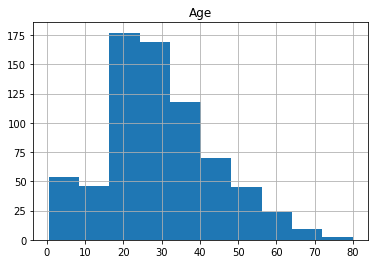

In [22]:
data.hist()
plt.show()

In [23]:
data.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


### 方法一（自带填补）

In [25]:
# Age数据中有部分缺失，使用均值添补
data1 = data.copy()
data1.Age.fillna(data.Age.mean, inplace=True)

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       891 non-null    object
 1   Sex       891 non-null    object
 2   Embarked  889 non-null    object
 3   Survived  891 non-null    object
dtypes: object(4)
memory usage: 34.8+ KB


### 方法二（impute填补）

In [27]:
# 使用sklearn impute函数补充
data2 = data.copy()
from sklearn.impute import SimpleImputer

# 填充不同类型数据
imp_maen = SimpleImputer(missing_values=np.nan, strategy="mean") # 默认是均值
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

imp_maen = imp_maen.fit_transform(data2.Age.values.reshape(-1, 1)) # 填补特征值必须是二维
imp_median = imp_median.fit_transform(data2.Age.values.reshape(-1, 1))

print("mean:{}\nmedian:{}".format(imp_maen[:5, :], imp_median[:5, :]))

# 更新数据
data2.Age = imp_median

mean:[[22.]
 [38.]
 [26.]
 [35.]
 [35.]]
median:[[22.]
 [38.]
 [26.]
 [35.]
 [35.]]


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [29]:
# 删除影响较小样本数据
data2.dropna(inplace=True)

In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       891 non-null    object
 1   Sex       891 non-null    object
 2   Embarked  889 non-null    object
 3   Survived  891 non-null    object
dtypes: object(4)
memory usage: 34.8+ KB


In [32]:
data1

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No
...,...,...,...,...
886,27.0,male,S,No
887,19.0,female,S,Yes
888,"<bound method NDFrame._add_numeric_operations.<locals>.mean of 0 22.0\n1 38.0\n2 26.0\n3 35.0\n4 35.0\n ... \n886 27.0\n887 19.0\n888 NaN\n889 26.0\n890 32.0\nName: Age, Length: 891, dtype: float64>",female,S,No
889,26.0,male,C,Unknown


In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


### 4.处理分类特征

#### 标签编码，　LabelEncoder

In [34]:
# 标签编码
from sklearn.preprocessing import LabelEncoder

In [35]:
# 取出标签
Y_label = data.iloc[:,-1]
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [36]:
Y_label

0           No
1          Yes
2          Yes
3          Yes
4           No
        ...   
886         No
887        Yes
888         No
889    Unknown
890         No
Name: Survived, Length: 891, dtype: object

In [37]:
le = LabelEncoder()

In [38]:
data.iloc[:, -1] = le.fit_transform(Y_label)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [39]:
# 标签编码的类别
le.classes_

array(['No', 'Unknown', 'Yes'], dtype=object)

In [40]:
le.get_params()

{}

#### 特征编码

#### preprocessing.OrdinalEncoder：特征专用，能够将**分类特征转**换为分类数值

In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
ord = OrdinalEncoder()
data_ = data2.copy()

In [43]:
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [44]:
data_.iloc[:, :-1] = ord.fit_transform(data_.iloc[:,:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,28.0,1.0,2.0,No
1,51.0,0.0,0.0,Yes
2,34.0,0.0,2.0,Yes
3,47.0,0.0,2.0,Yes
4,47.0,1.0,2.0,No


In [45]:
ord.categories_

[array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
         5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
        14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
        21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
        28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
        34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
        40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
        48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
        56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
        65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ]),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [46]:
data_.head()

,Age,Sex,Embarked,Survived
0,28.0,1.0,2.0,No
1,51.0,0.0,0.0,Yes
2,34.0,0.0,2.0,Yes
3,47.0,0.0,2.0,Yes
4,47.0,1.0,2.0,No


In [47]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    float64
 2   Embarked  889 non-null    float64
 3   Survived  889 non-null    object 
dtypes: float64(3), object(1)
memory usage: 34.7+ KB


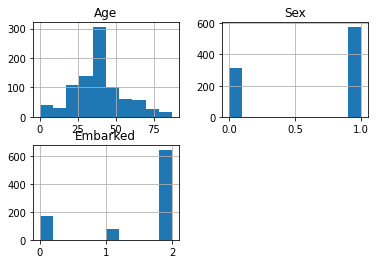

In [48]:
data_.hist()
plt.show()

#### preprocessing.OneHotEncoder：独热编码，创建哑变量

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
# 取出特征进行编码
fetaure = data2.iloc[:, 1:-1]
enc = OneHotEncoder(categories="auto").fit(fetaure)

In [51]:
result = enc.transform(fetaure)
result

<889x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1778 stored elements in Compressed Sparse Row format>

In [52]:
# 结果
pd_result = pd.DataFrame(result.toarray())
pd_result.head()

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [53]:
enc.get_params()

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'sparse': True}

In [54]:
# 得到编码的特征名称
enc.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [55]:
# 拼接数据，生成新的数据，删除修的特征
newdata = pd.concat([data2, pd_result], axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,No,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,Yes,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,Yes,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,Yes,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,No,0.0,1.0,0.0,0.0,1.0


In [56]:
newdata.drop(labels=["Sex", "Embarked"], axis=1, inplace=True)
newdata.dropna(inplace=True, axis=0)

In [57]:
# 添加新的数据标签
newdata.columns = ["Age", "Survived", 'x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S']

In [58]:
lbe = LabelEncoder()
newdata.loc[:, "Survived"] = lbe.fit_transform(newdata.loc[:, "Survived"])
newdata.head()

,Age,Survived,x0_female,x0_male,x1_C,x1_Q,x1_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [59]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        887 non-null    float64
 1   Survived   887 non-null    int64  
 2   x0_female  887 non-null    float64
 3   x0_male    887 non-null    float64
 4   x1_C       887 non-null    float64
 5   x1_Q       887 non-null    float64
 6   x1_S       887 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 55.4 KB


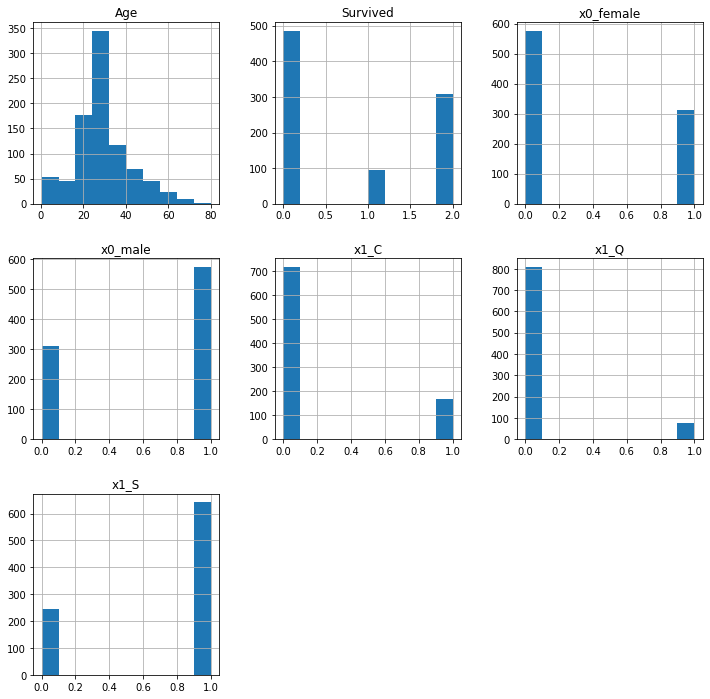

In [47]:
newdata.hist(figsize=(12, 12))
plt.savefig("imgs/data_hist.png")
plt.show()

In [48]:
# 数据保存
newdata.to_csv("./data/newdata")

### 5.处理连续特征

#### 二分类
设置阈值进行编码

In [51]:
data3 = data2.copy()
data3.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [52]:
# 年龄是连续属性的特征
from sklearn.preprocessing import Binarizer
Age_feature = data3.iloc[:, 0].values.reshape(-1, 1) # 注意：处理特征要是二维数据

In [53]:
ba = Binarizer(threshold=30)
age = ba.fit_transform(Age_feature)
age.sum()

303.0

In [54]:
ba.get_params()

{'copy': True, 'threshold': 30}

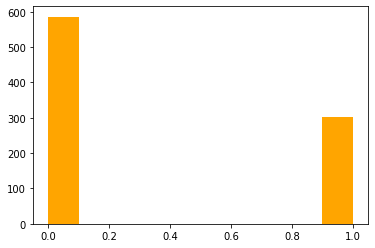

In [55]:
plt.hist(age, color="orange")
plt.show()

#### 多分类

In [68]:
from sklearn.preprocessing import KBinsDiscretizer

In [69]:
X = data2.iloc[:, 0].values.reshape(-1, 1)
X.shape

(889, 1)

{0.0, 1.0, 2.0, 3.0}


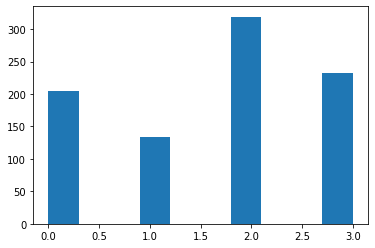

In [70]:
# 等位分箱 分类编码
est = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy="quantile")
print(set(est.fit_transform(X).ravel()))
plt.hist(est.fit_transform(X))
plt.show()

In [71]:
# 等位分箱  独热编码
est = KBinsDiscretizer(n_bins=3, encode="onehot", strategy="quantile")
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [103]:
est.inverse_transform(est.fit_transform(X))

array([[12.71],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [12.71],
       [28.  ],
       [12.71],
       [12.71],
       [55.5 ],
       [12.71],
       [55.5 ],
       [12.71],
       [55.5 ],
       [12.71],
       [28.  ],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [55.5 ],
       [12.71],
       [28.  ],
       [12.71],
       [55.5 ],
       [28.  ],
       [12.71],
       [28.  ],
       [28.  ],
       [55.5 ],
       [28.  ],
       [28.  ],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [28.  ],
       [12.71],
       [12.71],
       [12.71],
       [55.5 ],
       [28.  ],
       [28.  ],
       [12.71],
       [12.71],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [12.71],
       [12.71],
       [12.71],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [28.  ],
       [12.71],
       [28.  ],
       [12.71],
       [12.71],
       [12.71],
       [55.5 ],
       [